In [49]:
# If additional packages need to be used, uncomment the last two Lines of this cell and a list of additional packages. 
# This will ensure the notebook has all the dependencies satisfied and workes everywhere 

#import sys 
#!/sys.executable) pip install <package List> 

## Libraries

In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings 

pd.set_option('display.float_format', lambda num:'%1.3f'%num) 
pd.set_option('display.max_columns', 99)
filterwarnings('ignore')

# Data Description

| Feature                                                     	| Description|
|------------------------------------------------------------------------	|---	|
| app_id                                        	| The unique application id  	|
| category      	| The category under which app is categorized on the store.  	|
| reviews                    	| The number of reviews received on the store.  	|
| size                  	| Size of the app available for download (in KB/MB)  	|
| installs  	| The number of people who had installed this app atleast once.  	|
| price                                    	| The price of the app (in US $)  	|
| suitable_for        	| Rating given to app based on the usage and content.  	|
| last_update       	| When was the app updated last time by the developers.  	|
| latest_ver        	| The latest version of the app available for download.  	|
| popularity                                   	| User popularity (High/Low)  	|

# Data Wrangling & Visualization

In [51]:
train = pd.read_csv("../data/input/processed/train.csv")

In [52]:
train.head()

,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,app_id,popularity
0,SHOPPING,2788460,Varies with device,"100,000,000+",0,Teen,"July 30, 2018",Varies with device,9421,High
1,TOOLS,1,1.2M,100+,0,Everyone,"June 20, 2018",5.0,2668,High
2,FAMILY,769,13M,"100,000+",0,Everyone,"April 4, 2018",1.06,1837,High
3,FAMILY,89947,22M,"5,000,000+",0,Everyone 10+,"February 9, 2018",1.8.2,5003,High
4,SPORTS,232423,35M,"5,000,000+",0,Everyone,"June 11, 2018",4.2.2,4878,High


In [53]:
#Explore columns
train.columns

Index(['category', 'reviews', 'size', 'installs', 'price', 'suitable_for',
       'last_update', 'latest_ver', 'app_id', 'popularity'],
      dtype='object')

In [54]:
#Description
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      6275 non-null   object
 1   reviews       6275 non-null   object
 2   size          6275 non-null   object
 3   installs      6275 non-null   object
 4   price         6275 non-null   object
 5   suitable_for  6274 non-null   object
 6   last_update   6275 non-null   object
 7   latest_ver    6272 non-null   object
 8   app_id        6275 non-null   int64 
 9   popularity    6275 non-null   object
dtypes: int64(1), object(9)
memory usage: 490.4+ KB


Handling Null Values

In [55]:
train.isnull().sum()

category        0
reviews         0
size            0
installs        0
price           0
suitable_for    1
last_update     0
latest_ver      3
app_id          0
popularity      0
dtype: int64

In [56]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data

,Missing Ratio
latest_ver,0.048
suitable_for,0.016


Since the ratio of missing values for the rest of the columns is less (<0.05), we proceed to fill these with the mode values instead of dropping these rows.

In [57]:
# Fill the three columns with the mode value
train['latest_ver'] = train['latest_ver'].fillna(train['latest_ver'].mode()[0])
train['suitable_for'] = train['suitable_for'].fillna(train['suitable_for'].mode()[0])

Examine 'categories'

In [58]:
categories = list(train["category"].unique())
print(categories)

['SHOPPING', 'TOOLS', 'FAMILY', 'SPORTS', 'GAME', 'COMMUNICATION', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'LIFESTYLE', 'COMICS', 'FINANCE', 'BUSINESS', 'MEDICAL', 'BEAUTY', 'PHOTOGRAPHY', 'FOOD_AND_DRINK', 'PERSONALIZATION', 'LIBRARIES_AND_DEMO', 'PRODUCTIVITY', 'TRAVEL_AND_LOCAL', 'HOUSE_AND_HOME', 'HEALTH_AND_FITNESS', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION', 'WEATHER', 'ART_AND_DESIGN', 'SOCIAL', 'PARENTING', 'BOOKS_AND_REFERENCE', 'EDUCATION', 'DATING', 'EVENTS', 'AUTO_AND_VEHICLES', '1.9']


In [59]:
# Remove Category 1.9
train = train[train.category != "1.9"]

### Data Cleaning

Converting the "Installs", "Reviews", "Price" and "Size" columns to numeric values

In [60]:
# 'price' cleaning
train['price'] = train['price'].apply(lambda x : x.strip('$'))

In [61]:
# 'installs' cleaning
train['installs'] = train['installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [62]:
train.head()

,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,app_id,popularity
0,SHOPPING,2788460,Varies with device,100000000,0,Teen,"July 30, 2018",Varies with device,9421,High
1,TOOLS,1,1.2M,100,0,Everyone,"June 20, 2018",5.0,2668,High
2,FAMILY,769,13M,100000,0,Everyone,"April 4, 2018",1.06,1837,High
3,FAMILY,89947,22M,5000000,0,Everyone 10+,"February 9, 2018",1.8.2,5003,High
4,SPORTS,232423,35M,5000000,0,Everyone,"June 11, 2018",4.2.2,4878,High


In [63]:
# 'size' cleaning
train["size"] = train["size"].str.replace("Varies with device", "0")
train["size"] = (train["size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        train["size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

In [64]:
# 'latest_ver'
train["latest_ver"] = train["latest_ver"].str.replace("Varies with device", "0")

In [65]:
# Convert the column types to numeric values
train['size'] = train['size'].apply(lambda x: float(x))
train['installs'] = train['installs'].apply(lambda x: float(x))
train['price'] = train['price'].apply(lambda x: float(x))
train['reviews'] = train['reviews'].apply(lambda x: int(x))

**Handling Duplicates**

In [66]:
# Drop duplicates
train.drop_duplicates(inplace=True)

In [67]:
train.head()

,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,app_id,popularity
0,SHOPPING,2788460,0.000,100000000.000,0.000,Teen,"July 30, 2018",0,9421,High
1,TOOLS,1,1200000.000,100.000,0.000,Everyone,"June 20, 2018",5.0,2668,High
2,FAMILY,769,13000000.000,100000.000,0.000,Everyone,"April 4, 2018",1.06,1837,High
3,FAMILY,89947,22000000.000,5000000.000,0.000,Everyone 10+,"February 9, 2018",1.8.2,5003,High
4,SPORTS,232423,35000000.000,5000000.000,0.000,Everyone,"June 11, 2018",4.2.2,4878,High


In [68]:
# Display the dtypes of all the features in dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6067 entries, 0 to 6274
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      6067 non-null   object 
 1   reviews       6067 non-null   int64  
 2   size          6067 non-null   float64
 3   installs      6067 non-null   float64
 4   price         6067 non-null   float64
 5   suitable_for  6067 non-null   object 
 6   last_update   6067 non-null   object 
 7   latest_ver    6067 non-null   object 
 8   app_id        6067 non-null   int64  
 9   popularity    6067 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 521.4+ KB


# Visualization, Modeling, Machine Learning 
Build a model that can predict whether an app will become be trending or not and determine how different features influence the outcome. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate. 

- Build an optimized model that effectively solves the business problem. 
- The model will be evaluated on the basis of Accuracy. 
- Read the test.csv file and prepare features for testing.

<AxesSubplot:xlabel='popularity', ylabel='count'>

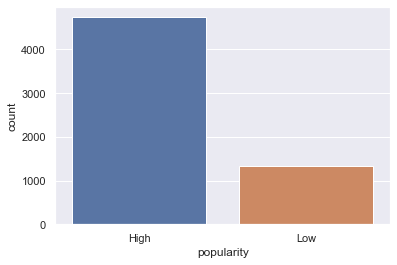

In [69]:
# Explore the distribution of the target column
sns.countplot(train['popularity'])

There are approximately 3X more High labels than Low. Thus there is some class imbalance.

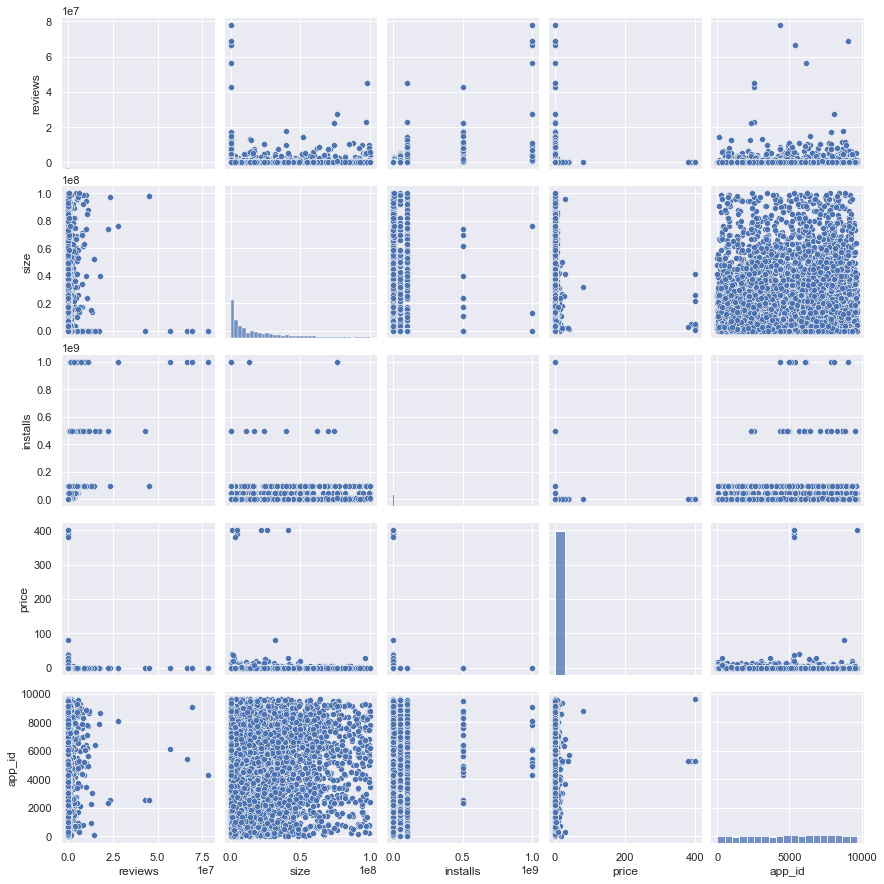

In [70]:
# Pairwise plot
sns.pairplot(train)

There might be a need to remove outliers or standardize the data.

<AxesSubplot:>

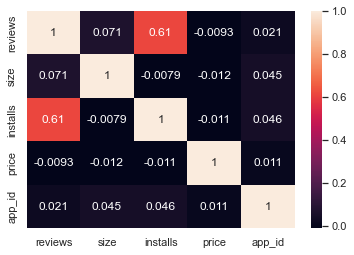

In [71]:
sns.heatmap(train.corr(), annot=True)

It seems there is a correlation between the number of 'installs' and number of 'reviews'.

### Market breakdown  
(installs vs category)

Text(0.5, 1.02, 'Installs vs Category')

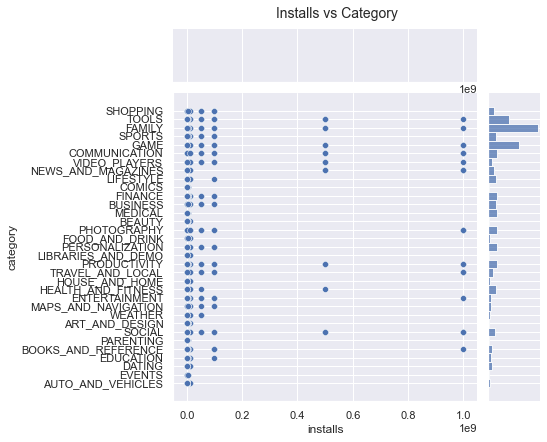

In [72]:
ax = sns.jointplot(train['installs'], train['category'])
ax.fig.suptitle("Installs vs Category", y = 1.02, fontsize=14 )

I broke down the apps by category and found that the Family and Game categories have the highest market prevalence. The Tools apps are also catching up.

### Sizing strategy

Text(0.5, 1.02, 'Popularity vs Size of Apps')

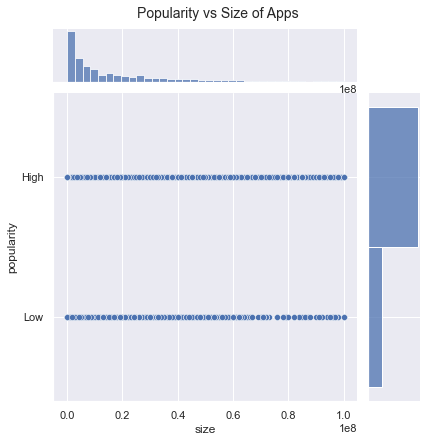

In [73]:
# 'size' vs popularity
ax = sns.jointplot(train['size'], train['popularity'])
ax.fig.suptitle("Popularity vs Size of Apps", y = 1.02, fontsize=14 )

Most popular apps are optimally sized between ~2MB to ~40MB i.e., neither too light nor too bulky.

### Bulky Apps

Text(0.5, 1.0, 'Count of Bulky Apps per Category')

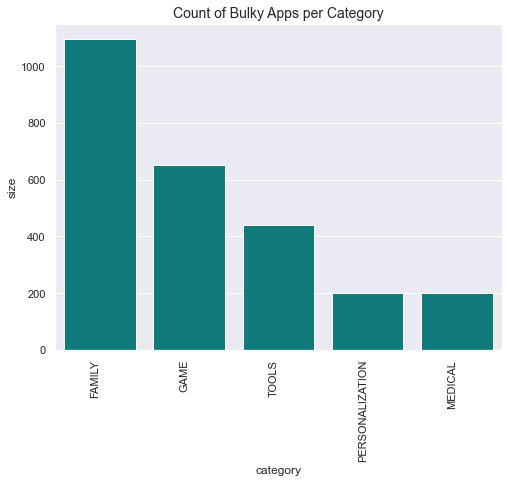

In [74]:
bulky_apps = train[train["size"]>40]
group_category = bulky_apps.groupby("category")["size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="category", y="size", data=group_category, color = "darkcyan")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Bulky Apps per Category',size = 14)

Its found that the Game and Family categories have the highest number of bulky apps.
We also observed that despite this, these bulky apps are fairly highly rated indicating that they are bulky for a purpose.

### Pricing analysis  
**vs Size**

<AxesSubplot:xlabel='size', ylabel='price'>

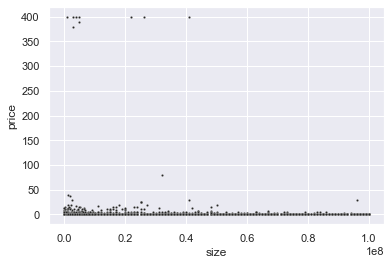

In [75]:
sns.scatterplot(x='size', y='price', data=train, s=5, color=".15")

Majority of the paid apps have small sizes which implies that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky. Users prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market.

**vs Category**

Text(0.5, 1.0, 'App pricing trend across categories')

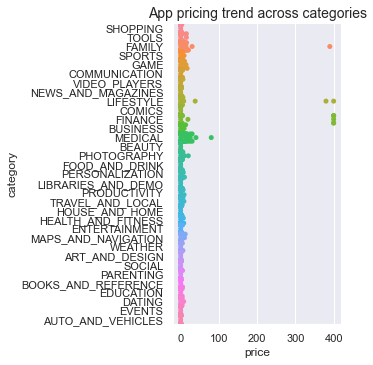

In [76]:
sns.set_style("darkgrid")
ax = sns.catplot(x="price", y="category", kind="swarm", data=train)
plt.title('App pricing trend across categories',size = 14)

Only categories Family, Lifestyle, Finance, and Business have apps with high prices. These could potentially be considered 'Junk' apps.

**vs Installs**

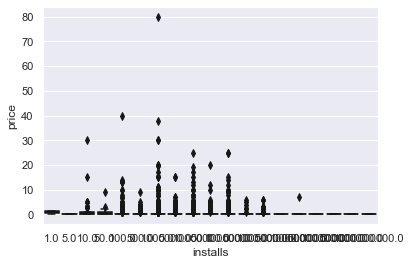

In [78]:
# Adoption of paid vs free apps
sns.boxplot(x='installs', y='price', data=train, color=".15")
plt.show()

### Junk Apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

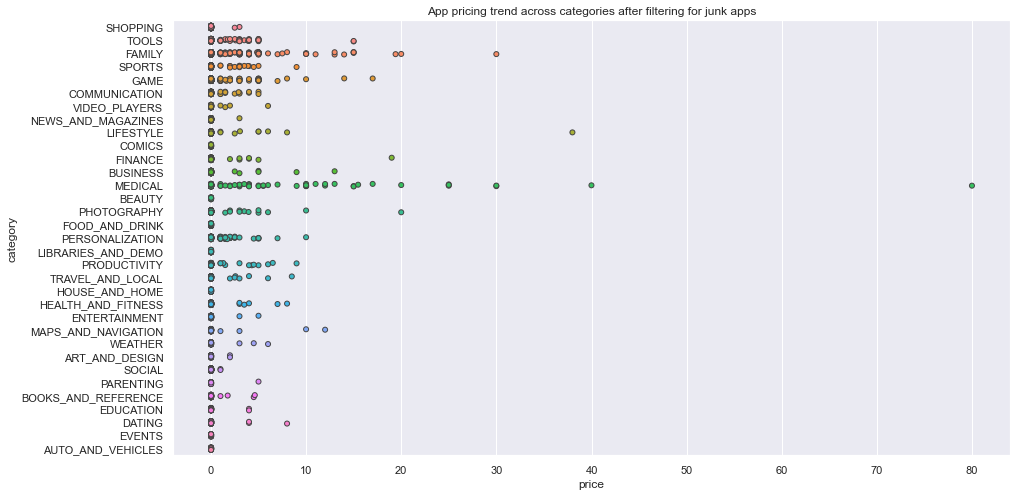

In [77]:
# Select apps priced below $100
train = train[train["price"] <100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = "price", y = "category", data = train, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

The apps now have a wider range of prices. The $80 cost for a Medical app might be a case for an app with extreme privacy and benefits. Apps with prices over 100 will be removed.

It turns out that paid apps have a relatively lower number of installs than free apps.

In [79]:
# Finding categories with best popularity
train.value_counts(subset=['category', 'popularity']).head(10)

category         popularity
FAMILY           High          884
GAME             High          624
TOOLS            High          338
FAMILY           Low           289
PERSONALIZATION  High          204
PHOTOGRAPHY      High          189
PRODUCTIVITY     High          180
COMMUNICATION    High          172
FINANCE          High          165
MEDICAL          High          162
dtype: int64

Family, Game and Tools have the most number of bulky apps and they also have the highest popularity.  
An app within one of these categores, which has a size less than 40MB, is either free or has a price less than $20 has a high chance of being popular.

## Features encoding

In [80]:
from sklearn import preprocessing
import time
import datetime
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [81]:
# Category features encoding
category_list = train['category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
train = pd.concat([train, pd.get_dummies(train['category'], prefix='cat')], axis=1)

In [82]:
# Encode 'suitable_for' features
le = preprocessing.LabelEncoder()
train['suitable_for'] = le.fit_transform(train['suitable_for'])

In [83]:
# 'last_update' encoding
train['last_update'] = train['last_update'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [84]:
# Bin 'installs'
bin_array = train.installs.sort_values().unique()

# convert to array
bins = [x for x in bin_array]

# Added 5 billion for the higher range of app installs
bins.append(5000000000)

# Create bins for installs
train['installs_binned'] = pd.cut(train['installs'], bins)

# Digitize the bins for encoding
installs_digitized = np.digitize(train['installs'], bins = bins )

# Add to the data frame as a column
train = train.assign(installs_d = pd.Series(installs_digitized).values)

In [85]:
# Drop irrelevant columns
train.drop(columns=['category', 'installs', 'installs_binned', 'app_id', 'latest_ver'], inplace=True)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6058 entries, 0 to 6274
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   reviews                  6058 non-null   int64  
 1   size                     6058 non-null   float64
 2   price                    6058 non-null   float64
 3   suitable_for             6058 non-null   int32  
 4   last_update              6058 non-null   float64
 5   popularity               6058 non-null   object 
 6   cat_ART_AND_DESIGN       6058 non-null   uint8  
 7   cat_AUTO_AND_VEHICLES    6058 non-null   uint8  
 8   cat_BEAUTY               6058 non-null   uint8  
 9   cat_BOOKS_AND_REFERENCE  6058 non-null   uint8  
 10  cat_BUSINESS             6058 non-null   uint8  
 11  cat_COMICS               6058 non-null   uint8  
 12  cat_COMMUNICATION        6058 non-null   uint8  
 13  cat_DATING               6058 non-null   uint8  
 14  cat_EDUCATION           

In [87]:
train.head(5)

,reviews,size,price,suitable_for,last_update,popularity,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,installs_d
0,2788460,0.000,0.000,4,1532880000.000,High,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,17
1,1,1200000.000,0.000,1,1529424000.000,High,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5
2,769,13000000.000,0.000,1,1522771200.000,High,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
3,89947,22000000.000,0.000,2,1518105600.000,High,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
4,232423,35000000.000,0.000,1,1528646400.000,High,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14


In [88]:
# Split data into training and testing sets
features = ['reviews', 'size', 'installs_d', 'price', 'suitable_for', 'last_update']
features.extend(category_list)
X = train[features]
y = train['popularity']

In [89]:
# Select numerical columns for MinMaxScaling
column_trans = make_column_transformer(
        (MinMaxScaler(), features),
        remainder='passthrough'
)
X_trans = column_trans.fit_transform(X)

In [90]:
# Split the dataset into 75% train data and 25% test data.
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size = 0.25, random_state = 10)

Why Accuracy?  
.............

## Modelling

In [91]:
# Make dict of models
models_dict = {
    "log_reg": LogisticRegression(max_iter=1000),
    "svm": LinearSVC(C=0.0001),
    "rf_clf": RandomForestClassifier(n_estimators=30, max_depth=9),
    "xgb_clf": XGBClassifier(n_estimators=30, max_depth=9),
}

In [92]:
for key, classifier in models_dict.items():
    print(f"Model: {classifier}")
    # fit the pipeline on the transformed data
    classifier.fit(X_train, y_train)   
    # make predictions
    y_pred = classifier.predict(X_test)
    # evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Model: LogisticRegression(max_iter=1000)
Accuracy: 76.63%
Model: LinearSVC(C=0.0001)
Accuracy: 77.03%
Model: RandomForestClassifier(max_depth=9, n_estimators=30)
Accuracy: 77.23%
Model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=9,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[11:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the

The XGBClassifier has the highest accuracy at 77.3%. Further new features can be generated through binning or discussions with a subject matter expert. Hyper parameter tuning can also be done to increase model accuracy score.

#### Show management the most important features in the model.

- ##### Visualize the top 20 features and their feature importance.

<AxesSubplot:>

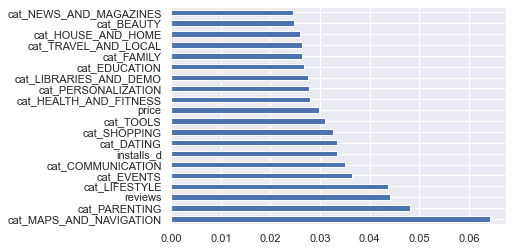

In [95]:
feat_importances = pd.Series(models_dict['xgb_clf'].feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

One-hot encoded app categories make up most of the top 20 features.  
Features 'size', 'suitable_for' may need further feature engineering through binning to create more meaningful relations.  
'last_update' can also be manipulated to be the difference between current date and last updated date.

## Inference

- ##### Submit the predictions on the test dataset using your optimized model

For each record in the test set ( test.csv), predict the popularity variable. Submit a CSV file with a header row and one row per test entry.

In [112]:
# Loading Test data 
test_data=pd.read_csv('./data/input/processed/test.csv')

In [113]:
test_data.drop(columns=['popularity'], inplace=True)
test_data.head()

,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,app_id
0,BEAUTY,62,3.1M,"10,000+",0,Everyone,"May 28, 2018",1.9.2,4855
1,FOOD_AND_DRINK,742,43M,"100,000+",0,Everyone,"July 25, 2018",2.1.0,3171
2,PRODUCTIVITY,166,6.1M,"10,000+",0,Everyone,"July 28, 2018",1.1,7424
3,PRODUCTIVITY,40328,23M,"1,000,000+",0,Everyone,"October 17, 2016",1.9,8710
4,FINANCE,6,6.2M,500+,0,Everyone,"August 3, 2018",2.0.10,6257


In [116]:
def row_operators(test):
    test = test.copy()
    test['suitable_for'] = test['suitable_for'].fillna(test['suitable_for'].mode()[0])
    test['price'] = test['price'].apply(lambda x : x.strip('$'))
    test['installs'] = test['installs'].apply(lambda x : x.strip('+').replace(',', ''))
    test["size"] = test["size"].str.replace("Varies with device", "0")
    test["size"] = (test["size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        test["size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

    test['size'] = test['size'].apply(lambda x: float(x))
    test['installs'] = test['installs'].apply(lambda x: float(x))
    test['price'] = test['price'].apply(lambda x: float(x))
    test['reviews'] = test['reviews'].apply(lambda x: int(x))
    
    test = test[test.category != "1.9"]
    test.drop_duplicates(inplace=True)
    test = test[test["price"] <100]
    
    return test

In [117]:
test_data = row_operators(test_data)

In [118]:
app_id_col = test_data['app_id']
app_id_col.shape

(3012,)

In [119]:
# Create function for performing feature engineering
def feature_engineering(test):
    category_list = test['category'].unique().tolist() 
    category_list = ['cat_' + word for word in category_list]
    test = pd.concat([test, pd.get_dummies(test['category'], prefix='cat')], axis=1)

    le = preprocessing.LabelEncoder()
    test['suitable_for'] = le.fit_transform(test['suitable_for'])
    test['last_update'] = test['last_update'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

    # Bin 'installs'
    bin_array = test.installs.sort_values().unique()
    # convert to array
    bins = [x for x in bin_array]
    # Added 5 billion for the higher range of app installs
    bins.append(5000000000)
    # Create bins for installs
    test['installs_binned'] = pd.cut(test['installs'], bins)
    # Digitize the bins for encoding
    installs_digitized = np.digitize(test['installs'], bins = bins )
    # Add to the data frame as a column
    test = test.assign(installs_d = pd.Series(installs_digitized).values)

    test.drop(columns=['category', 'installs', 'installs_binned', 'app_id', 'latest_ver'], inplace=True)

    features = ['reviews', 'size', 'installs_d', 'price', 'suitable_for', 'last_update']
    features.extend(category_list)
    X = test[features]

    column_trans = make_column_transformer(
        (MinMaxScaler(), features),
        remainder='passthrough'
    )
    test = column_trans.fit_transform(X)

    return test

In [120]:
test = feature_engineering(test_data)
y_pred = models_dict['xgb_clf'].predict(test)

The file (submissions.csv) should have exactly 2 columns: 
- app_id
- popularity

In [121]:
submission_df = app_id_col.to_frame()
submission_df['popularity'] = y_pred.tolist()
submission_df.head(5)

,app_id,popularity
0,4855,High
1,3171,Low
2,7424,High
3,8710,High
4,6257,High


In [122]:
# Submission
submission_df.to_csv('../data/output/submissions.csv', index=False)